# Example of scatter plot on SSI data

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from ssi import SSI

In [2]:
# Python ISIS3-SSI object parser
img = SSI('5126r_cal.pho.cub')

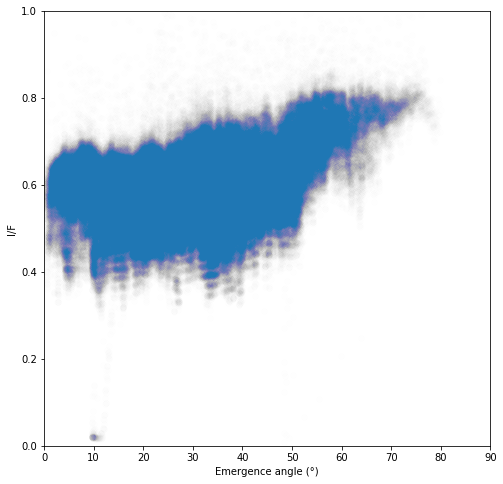

In [3]:
plt.figure(figsize=(8, 8))

plt.scatter(img.eme, img.data, alpha=.002)

plt.ylim(0, 1)
plt.xlim(0, 90)

plt.ylabel('I/F')
plt.xlabel('Emergence angle (°)');

## Masking data with boundary box

In [4]:
def mask_bbox(data, x0, y0, x1, y1):
    """Mask data on a boundry box.
    
    Parameters
    ----------
    data: np.array
        Input data to mask
    x0: int
        Top left corner x-coordinate.
    y0: int
        Top left corner y-coordinate.
    x1: int
        Bottom right corner x-coordinate.
    y1: int
        Bottom right corner y-coordinate.
        
    Note
    ----
    Data start at (1, 1) and ends at (NL, NS).
    
    """
    mask = np.ones(np.shape(data))
    xl, xr = int(min(x0, x1) - 1), int(max(x0, x1))
    yt, yb = int(min(y0, y1) - 1), int(max(y0, y1))
    mask[yt:yb, xl:xr] = 0
    return np.ma.array(data, mask=mask)

In [5]:
(x0, y0), (x1, y1) = (100, 200), (200, 250)
sub_data = mask_bbox(img.data, x0, y0, x1, y1)
sub_eme = mask_bbox(img.eme, x0, y0, x1, y1)

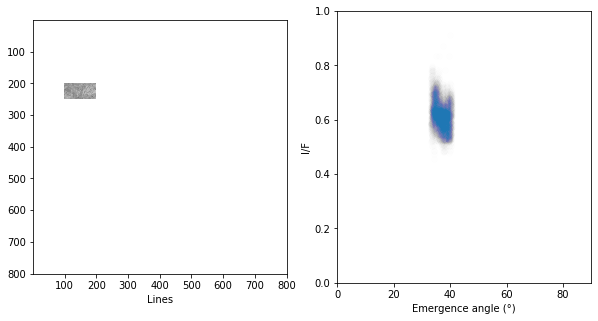

In [6]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.imshow(sub_data, extent=img.extent, vmin=0, vmax=1, cmap='gray')
ax1.scatter(sub_eme, sub_data, alpha=.002)

plt.ylim(0, 1)
plt.xlim(0, 90)

ax0.set_xlabel('Samples')
ax0.set_xlabel('Lines')

ax1.set_ylabel('I/F')
ax1.set_xlabel('Emergence angle (°)');

## Masking data based on the pixel geographic coordinates

In [7]:
cond = (120 < img.lon) & (img.lon <= 140) & (0 < img.lat) & (img.lat <= 15)

sub_data = np.ma.array(img.data, mask=~cond)
sub_eme = np.ma.array(img.eme, mask=~cond)

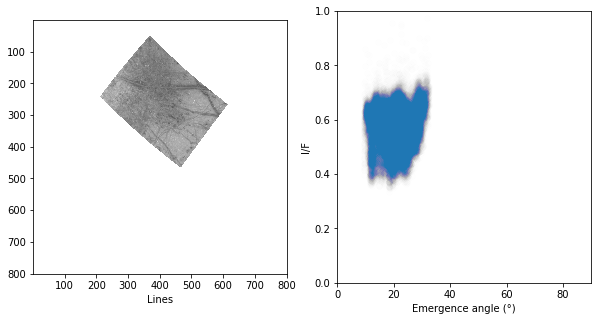

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.imshow(sub_data, extent=img.extent, vmin=0, vmax=1, cmap='gray')
ax1.scatter(sub_eme, sub_data, alpha=.002)

plt.ylim(0, 1)
plt.xlim(0, 90)

ax0.set_xlabel('Samples')
ax0.set_xlabel('Lines')

ax1.set_ylabel('I/F')
ax1.set_xlabel('Emergence angle (°)');

## Masking data on pixel illumination

In [9]:
cond = (20 < img.inc) & (img.inc <= 30) & (10 < img.eme) & (img.eme <= 30)

sub_data = np.ma.array(img.data, mask=~cond)
sub_eme = np.ma.array(img.eme, mask=~cond)

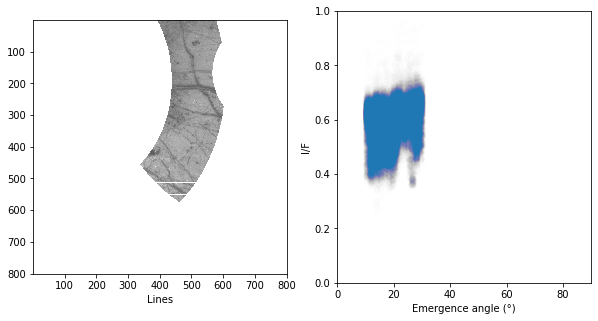

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.imshow(sub_data, extent=img.extent, vmin=0, vmax=1, cmap='gray')
ax1.scatter(sub_eme, sub_data, alpha=.002)

plt.ylim(0, 1)
plt.xlim(0, 90)

ax0.set_xlabel('Samples')
ax0.set_xlabel('Lines')

ax1.set_ylabel('I/F')
ax1.set_xlabel('Emergence angle (°)');